<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#ASSIGNMENT" data-toc-modified-id="ASSIGNMENT-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>ASSIGNMENT</a></span></li><li><span><a href="#QUESTION-1" data-toc-modified-id="QUESTION-1-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>QUESTION 1</a></span><ul class="toc-item"><li><span><a href="#Split-The-Dataset" data-toc-modified-id="Split-The-Dataset-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Split The Dataset</a></span></li><li><span><a href="#Examine-Training-Data-for-Missing-and-Extreme-Values" data-toc-modified-id="Examine-Training-Data-for-Missing-and-Extreme-Values-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Examine Training Data for Missing and Extreme Values</a></span></li><li><span><a href="#Create-Histogram-and-Scatter-Plot" data-toc-modified-id="Create-Histogram-and-Scatter-Plot-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Create Histogram and Scatter Plot</a></span></li><li><span><a href="#Are-the-data-appropriate-for-linear-regression" data-toc-modified-id="Are-the-data-appropriate-for-linear-regression-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Are the data appropriate for linear regression</a></span></li></ul></li></ul></div>

# ASSIGNMENT

We will predict employee salaries from different employee characteristics (or features). We are going to use a simple supervised learning technique: linear regression. We want to build a simple model to determine how well Years Worked predicts an employee’s salary. Import the data salary.csv to a Jupyter Notebook. A description of the variables is given in Salary Metadata.

# QUESTION 1

Split your data into a training and test set. Leave the test set for now. Examine the training data for missing and extreme values. Create histograms to show the distribution of the variables and a scatterplot showing the relationship between Years Worked and Salary. Are the data appropriate for linear regression? Is there anything that needs to be transformed or edited first?

## Split The Dataset

In [36]:
# import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

# set graph style
sns.set()
sns.set(rc={'figure.figsize':(12,8)})
sns.set(font_scale=1)

# load the salary dataset
df = pd.read_csv('salary.csv')

# split the data
train, test = train_test_split(df, test_size=0.2)
print(train.shape, test.shape)

(411, 11) (103, 11)


## Examine Training Data for Missing and Extreme Values

In [37]:
# search for missing values
x = train.isnull().sum()
x

salary         1
exprior        0
yearsworked    0
yearsrank      0
market         0
degree         0
otherqual      0
position       0
male           0
Field          0
yearsabs       0
dtype: int64

There is one missing value for the variable salary. Plan of action is to replace it with the mean.

In [38]:
# replace the missing value with the mean
train['salary'] = train.fillna(train['salary'].mean())

# checking for missing values
x1 = train.isnull().sum()
x1

/home/recruit/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


salary         0
exprior        0
yearsworked    0
yearsrank      0
market         0
degree         0
otherqual      0
position       0
male           0
Field          0
yearsabs       0
dtype: int64

In [39]:
# detecting extreme values using IQR
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1

# removing outliers from the dataset
train_out = train[~((train < (Q1 - 1.5 * IQR)) | (train > (Q3 + 1.5 * IQR))).any(axis=1)]

train_out.shape

(290, 11)

## Create Histogram and Scatter Plot

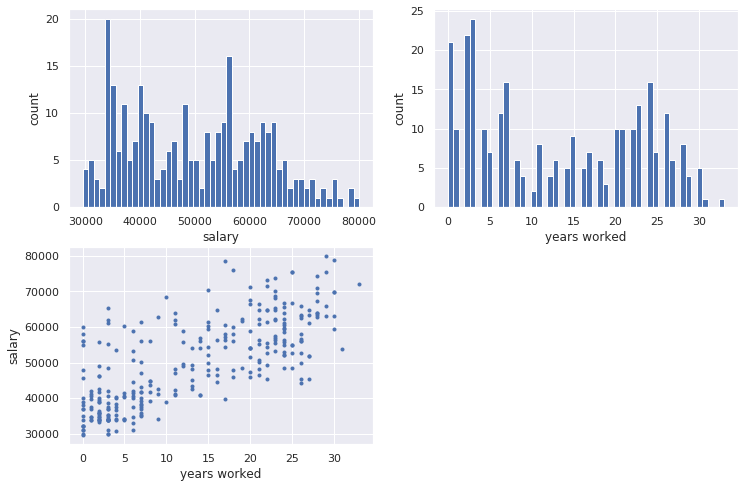

In [40]:
# create new data frame 
train_new = pd.DataFrame(train_out, columns=['salary', 'yearsworked'])

salary = train_new.salary
yearsworked = train_new.yearsworked

# plot histograms and scatter plot
ax = plt.subplot(221)
_ = plt.hist(salary, bins=50)
_ = plt.xlabel('salary')
_ = plt.ylabel('count')

ax = plt.subplot(222)
_ = plt.hist(yearsworked, bins=50)
_ = plt.xlabel('years worked')
_ = plt.ylabel('count')

ax = plt.subplot(223)
_ = plt.plot(yearsworked, salary, marker='.', linestyle='none')
_ = plt.xlabel('years worked')
_ = plt.ylabel('salary')

## Are the data appropriate for linear regression

ASSUMPTION 1: The Dependent and Independent variable must have a linear relationship

Analyzing the Salary vs Years Worked Scatter Plot, it is clear that there is a linear relationship between salary and years worked, therefore first assumption of a Linear Regression has been satisfied.

In [43]:
# ASSUMPTION 2: No Autocorrelation in residuals

# import modules
import numpy as np
from statsmodels.compat import lzip
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

# Fit regression model (using the natural log of one of the regressors)
results = smf.ols('salary ~ yearsworked', data=train_new).fit()

# Inpect Results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     349.9
Date:                Tue, 11 Feb 2020   Prob (F-statistic):           1.17e-51
Time:                        16:48:32   Log-Likelihood:                -3028.2
No. Observations:                 290   AIC:                             6060.
Df Residuals:                     288   BIC:                             6068.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     3.77e+04    816.961     46.152      